In [1]:
import pandas as pd

In [2]:
korea_cd = pd.read_csv('korea_cd_raw.csv').T.iloc[4:]
korea_cd.index = pd.to_datetime(korea_cd.index)
korea_cd.columns = ['korea_cd91']
korea_cd

,korea_cd91
2000-01-04,7.35
2000-01-05,7.37
2000-01-06,7.38
2000-01-07,7.38
2000-01-08,7.38
...,...
2024-09-09,3.51
2024-09-10,3.51
2024-09-11,3.51
2024-09-12,3.51


In [3]:
treasury_3m = pd.read_csv('treasury_3month_raw.csv').set_index('DATE')['2000':]
treasury_3m.index = pd.to_datetime(treasury_3m.index)
treasury_3m.columns = ['treasury_3m']
treasury_3m = treasury_3m.replace('.', float('nan')) # 데이터의 값이 .으로 표시되어 있다면 nan으로 변환
treasury_3m.ffill(inplace=True) # 빈 데이터는 앞의 값으로 채우기
treasury_3m

,treasury_3m
DATE,
2000-01-03,5.48
2000-01-04,5.43
2000-01-05,5.44
2000-01-06,5.41
2000-01-07,5.38
...,...
2024-09-09,5.11
2024-09-10,5.06
2024-09-11,5.1


In [28]:
usdkrw = pd.read_csv('usd_krw_raw.csv').T.iloc[4:,3].to_frame()
usdkrw.columns = ['usdkrw']
usdkrw.index = pd.to_datetime(usdkrw.index)
usdkrw.ffill(inplace=True)
usdkrw

,usdkrw
2000-01-04,1122.5
2000-01-05,1135.0
2000-01-06,1146.6
2000-01-07,1138.0
2000-01-08,1138.0
...,...
2024-09-09,1339.8
2024-09-10,1343.7
2024-09-11,1339
2024-09-12,1338.7


In [30]:
korea_cd.to_csv('korea_cd_daily.csv')
treasury_3m.to_csv('treasury_3month_daily.csv')
usdkrw.to_csv('usd_krw_daily.csv')

In [31]:
# 각각의 일별데이터를 분기 마지막 데이터로 변환
korea_cd_q = korea_cd.resample('QE').last()
treasury_3m_q = treasury_3m.resample('QE').last()
usdkrw_q = usdkrw.resample('QE').last()

In [32]:
korea_cd_q.to_csv('korea_cd_quarterly.csv')
treasury_3m_q.to_csv('treasury_3month_quarterly.csv')
usdkrw_q.to_csv('usd_krw_quarterly.csv')

In [33]:
import pandas as pd

# 파일 경로 설정
daily_files = {
    'korea_cd_daily': 'korea_cd_daily.csv',
    'treasury_3month_daily': 'treasury_3month_daily.csv',
    'usd_krw_daily': 'usd_krw_daily.csv'
}

quarterly_files = {
    'korea_cd_quarterly': 'korea_cd_quarterly.csv',
    'treasury_3month_quarterly': 'treasury_3month_quarterly.csv',
    'usd_krw_quarterly': 'usd_krw_quarterly.csv'
}

# 일간 데이터 로드
daily_dfs = []
for name, file_path in daily_files.items():
    df = pd.read_csv(file_path, parse_dates=True, index_col=0)
    df.columns = [name]  # 컬럼명을 파일명으로 설정
    daily_dfs.append(df)

# 분기 데이터 로드
quarterly_dfs = []
for name, file_path in quarterly_files.items():
    df = pd.read_csv(file_path, parse_dates=True, index_col=0)
    df.columns = [name]  # 컬럼명을 파일명으로 설정
    quarterly_dfs.append(df)

# 일간 데이터 합치기 (날짜 기준으로 병합하고 ffill로 빈 데이터 채우기)
daily_combined = pd.concat(daily_dfs, axis=1).sort_index().ffill()

# 분기 데이터 합치기 (날짜 기준으로 병합하고 ffill로 빈 데이터 채우기)
quarterly_combined = pd.concat(quarterly_dfs, axis=1).sort_index()


In [34]:
daily_combined.iloc[1:].to_csv('daily_combined.csv')

In [35]:
quarterly_combined.to_csv('quarterly_combined.csv')

In [4]:

pce_raw_data = pd.read_csv('korea_pce_monthly_yoy_rawdata.csv')
pce_data_index = pce_raw_data.T.iloc[1::3,1]
pce_data = pce_raw_data.T.iloc[2::3,1]
pce_data.index = pd.DatetimeIndex(pce_data_index.index)

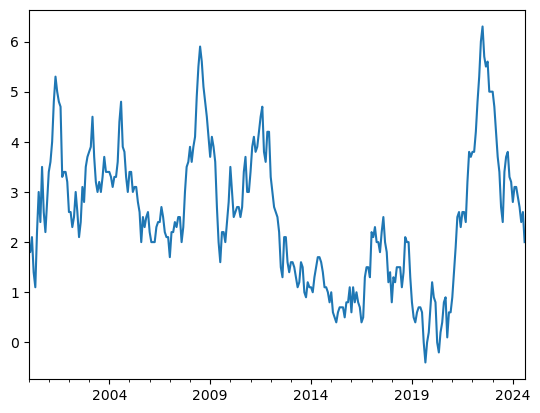

In [5]:
pce_data.astype(float).plot()
pce_data.to_csv('korea_pce_monthly_yoy.csv')

In [33]:
import pandas as pd

# CSV 파일 읽기
df = pd.read_csv('WTI_raw.csv')
df.columns = ['Date', 'Close','Open','high','Low','Volume','pct']

# 날짜를 pandas datetime으로 변환
df['Date'] = pd.to_datetime(df['Date'])
# Date를 index로 설정
df = df.set_index('Date')
# 오래된데이터가 첫줄에 오도록 정렬
df = df.sort_index()

In [36]:
# 월별데이터의 전년동기대비 종가 상승률을 구하고자함
wti_yoy = df['Close'].pct_change(12).dropna()

In [38]:
wti_yoy.to_csv('WTI_yoy.csv')